# WeatherPy
----


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_DataFrame = pd.DataFrame(cities, columns = ['cities'])
city_DataFrame

,cities
0,mys shmidta
1,nisia floresta
2,hobart
3,shimoda
4,galich
...,...
602,upington
603,doha
604,kutina
605,lamu


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# JSON
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -134.9692,
        "lat": -23.1203
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 78.58,
        "feels_like": 79.52,
        "temp_min": 78.58,
        "temp_max": 78.58,
        "pressure": 1018,
        "humidity": 72,
        "sea_level": 1018,
        "grnd_level": 1015
    },
    "visibility": 10000,
    "wind": {
        "speed": 16.37,
        "deg": 34,
        "gust": 17.69
    },
    "clouds": {
        "all": 100
    },
    "dt": 1619290831,
    "sys": {
        "country": "PF",
        "sunrise": 1619277406,
        "sunset": 1619318325
    },
    "timezone": -32400,
    "id": 4030556,
    "name": "Rikitea",
    "cod": 200
}


In [5]:
#Print start of output
print("Beginning Data Retrieval ")
print("-------------------------------")


# Set up lists to hold reponse info
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
new_city = 1

#Make a for loop to loop through cities ... 
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {new_city} | {city}")
        
        new_city += 1
        
    except(KeyError):
        print("City not found. Skipping...")
# Print end of output      
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 | nisia floresta
Processing Record 2 | hobart
Processing Record 3 | shimoda
Processing Record 4 | galich
Processing Record 5 | albany
City not found. Skipping...
Processing Record 6 | westerland
Processing Record 7 | sept-iles
Processing Record 8 | thompson
Processing Record 9 | carnarvon
Processing Record 10 | mataura
City not found. Skipping...
Processing Record 11 | bemidji
Processing Record 12 | tasiilaq
Processing Record 13 | traverse city
Processing Record 14 | bredasdorp
Processing Record 15 | khatanga
Processing Record 16 | qaanaaq
Processing Record 17 | mount isa
Processing Record 18 | nikolskoye
Processing Record 19 | rikitea
Processing Record 20 | deputatskiy
Processing Record 21 | atuona
Processing Record 22 | ushuaia
Processing Record 23 | anori
Processing Record 24 | yangambi
City not found. Skipping...
Processing Record 25 | peniche
Processing Record 26 | bilibino
Pr

Processing Record 230 | danville
Processing Record 231 | luderitz
Processing Record 232 | zambezi
Processing Record 233 | leningradskiy
Processing Record 234 | port elizabeth
Processing Record 235 | sagua de tanamo
Processing Record 236 | machiques
Processing Record 237 | quelimane
Processing Record 238 | saint george
Processing Record 239 | atlantic beach
Processing Record 240 | morehead
Processing Record 241 | vestmannaeyjar


ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": temp, "Humidity": humidity, "Clouds": cloudiness,
                           "Wind Speed": wind, "Country": country, "Date": date})



# Export the city data into a .csv
weather_dict.to_csv("output_data/cities.csv", index=False)

weather_dict

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Nísia Floresta,-6.0911,-35.2086,83.30,74,20,11.50,BR,1619291293
1,Hobart,-42.8794,147.3294,47.93,76,40,10.36,AU,1619290836
2,Shimoda,34.6667,138.9500,50.97,82,16,3.00,JP,1619291300
3,Galich,58.3797,42.3475,48.61,75,98,12.64,RU,1619291349
4,Albany,42.6001,-73.9662,68.61,18,87,4.00,US,1619290743
...,...,...,...,...,...,...,...,...,...
236,Quelimane,-17.8786,36.8883,75.09,83,20,3.44,MZ,1619291398
237,Saint George,37.1041,-113.5841,78.80,18,100,1.01,US,1619290788
238,Atlantic Beach,30.3344,-81.3987,79.14,83,75,24.16,US,1619291326
239,Morehead,37.2711,-87.1764,51.93,93,90,8.05,US,1619290899


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity_df = weather_dict.loc[weather_dict["Humidity"] > 100]
humidity_df


,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# Zero cities over 100 percent humidity 

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

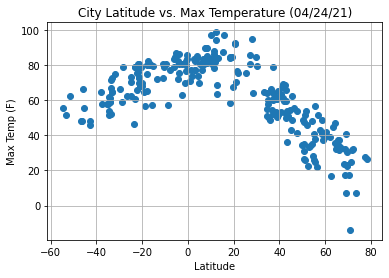

In [28]:
#Use proper labeling of the plots using plot titles (including date of analysis)
plt.scatter(weather_dict['Lat'], weather_dict['Max Temp'])
plt.title('City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(True)

#Save the plotted figures as .pngs
plt.savefig("./output_Data/City_Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

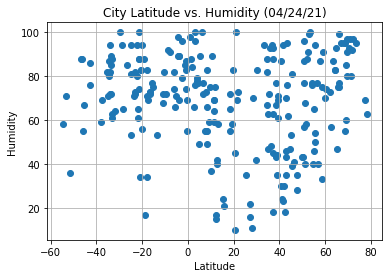

In [29]:
#Use proper labeling of the plots using plot titles (including date of analysis)
plt.scatter(weather_dict['Lat'], weather_dict['Humidity'])
plt.title('City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

#Save the plotted figures as .pngs
plt.savefig("./output_Data/City_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

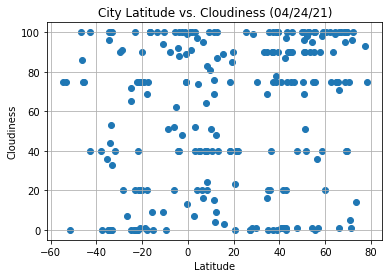

In [30]:
#Use proper labeling of the plots using plot titles (including date of analysis)
plt.scatter(weather_dict['Lat'], weather_dict['Clouds'])
plt.title('City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

#Save the plotted figures as .pngs
plt.savefig("./output_Data/City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

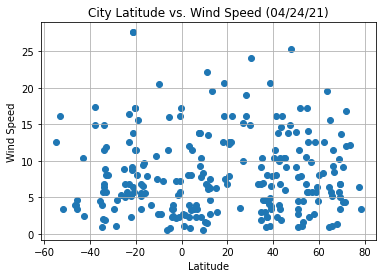

In [31]:
#Use proper labeling of the plots using plot titles (including date of analysis)
plt.scatter(weather_dict['Lat'], weather_dict['Wind Speed'])
plt.title('City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

#Save the plotted figures as .pngs
plt.savefig("./output_Data/City_Latitude_vs_Wind.png")

## Linear Regression

In [42]:
#North Hemp
north_df = weather_dict.loc[pd.to_numeric(weather_dict["Lat"]).astype(float) > 0, :]

#South Hemp
south_df = weather_dict.loc[pd.to_numeric(weather_dict["Lat"]).astype(float) < 0, :]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8869714418890536


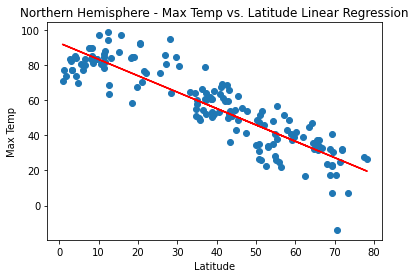

In [67]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7165733671011236


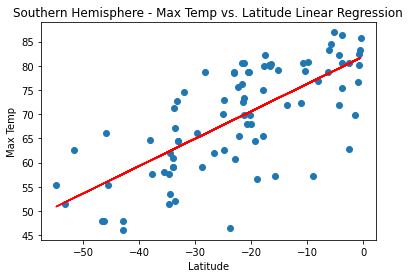

In [68]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17129113831541334


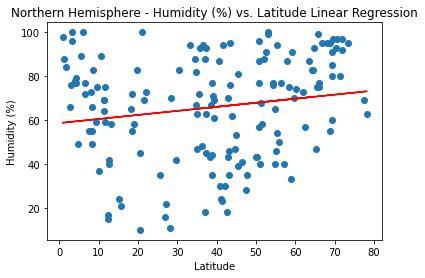

In [69]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13224207618691847


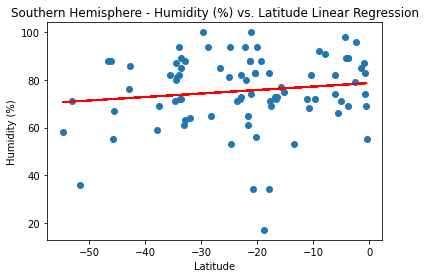

In [70]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19240917299605403


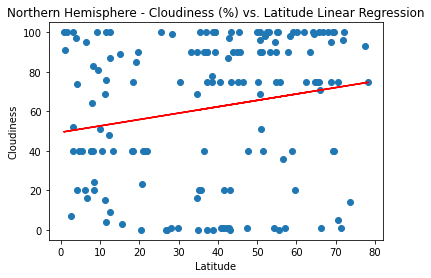

In [71]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13651784968616354


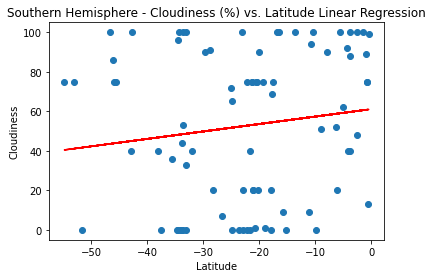

In [72]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.029647392848642883


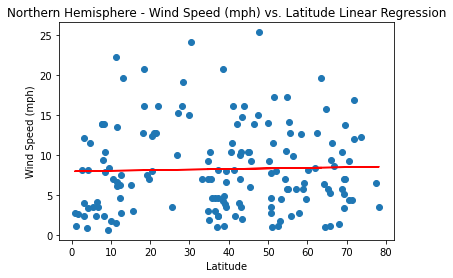

In [73]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.024637227978783347


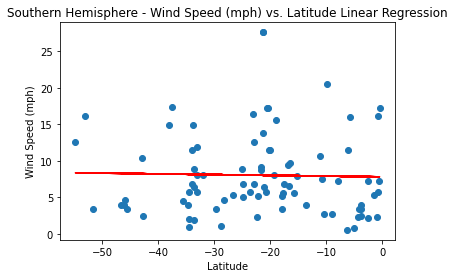

In [74]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x_values,regress_values, "r-")
print(f"The r-squared is: {rvalue}")

#Save the plotted figures as .pngs
plt.savefig("./output_Data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")